In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import torch
from torch import nn
from torch import optim
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, models
from torch.autograd import Variable
import torch.utils.data as data
import pandas as pd
import os
from PIL import Image
from torch.utils.data import DataLoader, TensorDataset
from torchvision.datasets import ImageFolder

In [3]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(DEVICE)

cuda


In [4]:
#계속 같은 결과 나오도록 하는 코드 (https://hoya012.github.io/blog/reproducible_pytorch/)
#random_seed 숫자만 바꿔가면서 코드 실행하면돼!
import random

random_seed = 42

torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True  #계산속도 느려질 수 있대 너무 느려지면 주석처리하기
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)

In [5]:
# paths for (labeled) training & validation data.
train_path = '/content/drive/MyDrive/FashionClassification/Train/'
valid_path = '/content/drive/MyDrive/FashionClassification/Validation/'
aug_path = '/content/drive/MyDrive/FashionClassification/Aug2/'

In [ ]:
# #이미 데이터 늘린 코드라 안돌려도돼!
# import random
# import os
# import cv2
# import glob
# from PIL import Image
# import PIL.ImageOps    

# #다음 변수를 수정하여 새로 만들 이미지 갯수를 정합니다.
# num_augmented_images = 2400

# file_path1 = '/content/drive/MyDrive/FashionClassification/Train/Sporty'
# file_path2 = '/content/drive/MyDrive/FashionClassification/Train/Retro'
# file_path3 = '/content/drive/MyDrive/FashionClassification/Train/Resort'
# file_names1 = os.listdir(file_path1)
# file_names2 = os.listdir(file_path2)
# file_names3 = os.listdir(file_path3)

# save_path1 = '/content/drive/MyDrive/FashionClassification/Aug2/Sporty/'
# save_path2 = '/content/drive/MyDrive/FashionClassification/Aug2/Retro/'
# save_path3 = '/content/drive/MyDrive/FashionClassification/Aug2/Resort/'
# total_origin_image_num = len(file_names1)
# augment_cnt = 1

# for i in range(1, num_augmented_images):
#     change_picture_index = random.randrange(1, total_origin_image_num-1)
#     print(change_picture_index)
#     #print(file_names[change_picture_index])
#     file_name1 = file_names1[change_picture_index]
#     file_name2 = file_names2[change_picture_index]
#     file_name3 = file_names3[change_picture_index]

#     origin_image_path1 = file_path1 +'/'+ file_name1
#     origin_image_path2 = file_path2 + '/'+file_name2
#     origin_image_path3 = file_path3 + '/'+file_name3

#     #print(origin_image_path)
#     image1 = Image.open(origin_image_path1)
#     image2 = Image.open(origin_image_path2)
#     image3 = Image.open(origin_image_path3)

#     random_augment = random.randrange(1,3)
    
#     if(random_augment == 1):
#         #이미지 좌우 반전
#         print("invert")
#         inverted_image1 = image1.transpose(Image.FLIP_LEFT_RIGHT)
#         inverted_image2 = image2.transpose(Image.FLIP_LEFT_RIGHT)
#         inverted_image3 = image3.transpose(Image.FLIP_LEFT_RIGHT)

#         inverted_image1.save(save_path1 + 'inverted_' + str(augment_cnt) + '.png')
#         inverted_image2.save(save_path2 + 'inverted_' + str(augment_cnt) + '.png')
#         inverted_image3.save(save_path3 + 'inverted_' + str(augment_cnt) + '.png')

#     elif(random_augment == 2):
#         #이미지 기울이기
#         print("rotate")
#         rotated_image1 = image1.rotate(random.randrange(-30, 30))
#         rotated_image2 = image2.rotate(random.randrange(-30, 30))
#         rotated_image3 = image3.rotate(random.randrange(-30, 30))

#         rotated_image1.save(save_path1 + 'rotated_' + str(augment_cnt) + '.png')
#         rotated_image2.save(save_path2 + 'rotated_' + str(augment_cnt) + '.png')
#         rotated_image3.save(save_path3 + 'rotated_' + str(augment_cnt) + '.png')
        
#     # elif(random_augment == 3):
#     #     #노이즈 추가하기
#     #     img1 = cv2.imread(origin_image_path1)
#     #     img2 = cv2.imread(origin_image_path2)
#     #     img3 = cv2.imread(origin_image_path3)

#     #     print("noise")
#     #     row1,col1,ch1= img1.shape
#     #     row2,col2,ch2= img2.shape
#     #     row3,col3,ch3= img3.shape

#     #     mean = 0
#     #     var = 0.1
#     #     sigma = var**0.5
#     #     gauss1 = np.random.normal(mean,sigma,(row1,col1,ch1))
#     #     gauss2 = np.random.normal(mean,sigma,(row2,col2,ch2))
#     #     gauss3 = np.random.normal(mean,sigma,(row3,col3,ch3))

#     #     gauss1 = gauss1.reshape(row1,col1,ch1)
#     #     gauss2 = gauss2.reshape(row2,col2,ch2)
#     #     gauss3 = gauss3.reshape(row3,col3,ch3)

#     #     noisy_array1 = img1 + gauss1
#     #     noisy_array2 = img2 + gauss2
#     #     noisy_array3 = img3 + gauss3

#     #     noisy_image1 = Image.fromarray(np.uint8(noisy_array1)).convert('RGB')
#     #     noisy_image2 = Image.fromarray(np.uint8(noisy_array2)).convert('RGB')
#     #     noisy_image3 = Image.fromarray(np.uint8(noisy_array3)).convert('RGB')

#     #     noisy_image1.save(save_path1 + 'noiseAdded_' + str(augment_cnt) + '.png')
#     #     noisy_image2.save(save_path2 + 'noiseAdded_' + str(augment_cnt) + '.png')
#     #     noisy_image3.save(save_path3 + 'noiseAdded_' + str(augment_cnt) + '.png')

#     augment_cnt += 1
    

In [6]:
# prepare training data set
classes = ['Resort', 'Retro', 'Sporty']

data =[]
label =[]

## i : Integer representation for each classes (Resort/Retro/Sporty -> 0/1/2)
for i, d in enumerate(classes):
    files = os.listdir(train_path+'/'+d)
    
    for f in files:
        img = Image.open(train_path+'/'+d+'/'+f,'r')
        img = img.resize((227, 227)) #(150,150)
        img = np.asarray(np.float32(img))
        data.append(img.transpose(2,0,1))  # (150,150,3) --> (3,150,150)
        label.append(i)

for i, d in enumerate(classes):
    files = os.listdir(aug_path+'/'+d)
    
    for f in files:
        img = Image.open(aug_path+'/'+d+'/'+f,'r')
        img = img.resize((227, 227)) #(150,150)
        img = np.asarray(np.float32(img))
        data.append(img.transpose(2,0,1))  # (150,150,3) --> (3,150,150)
        label.append(i)     
        
data = np.array(data, dtype='float32')
label = np.array(label, dtype='int64')

train_X = torch.from_numpy(data) #numpy to tensor
train_Y = torch.from_numpy(label)

train_X = train_X.type(torch.cuda.FloatTensor) #32bit
train_Y = train_Y.type(torch.cuda.LongTensor) #For CrossEntropy Loss

train_dataset = TensorDataset(train_X,train_Y)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

In [7]:
data.shape, label.shape  # check

((14397, 3, 227, 227), (14397,))

In [8]:
# prepare validation data set
data =[]
label =[]

for i, d in enumerate(classes):
    files = os.listdir(valid_path+'/'+d)
    
    for f in files:
        img = Image.open(valid_path+'/'+d+'/'+f,'r')
        img = img.resize((227, 227))
        img = np.asarray(np.float32(img))
        data.append(img.transpose(2,0,1)) # (150,150,3) --> (3,150,150)
        label.append(i)
        
data = np.array(data, dtype='float32')
label = np.array(label, dtype='int64')

valid_X = torch.from_numpy(data)
valid_Y = torch.from_numpy(label)

valid_X = valid_X.type(torch.cuda.FloatTensor)
valid_Y = valid_Y.type(torch.cuda.LongTensor)

valid_dataset = TensorDataset(valid_X,valid_Y)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

In [9]:
data.shape, label.shape  # check

((1800, 3, 227, 227), (1800,))

In [10]:
# Build convolutional neural net
class AlexNet(nn.Module): # AlexNet 모델 설계
    def __init__(self, n_classes = 3):   
        super(AlexNet, self).__init__()

        # 1st conv layer
        self.Conv_1 = nn.Sequential(
          nn.Conv2d(in_channels = 3, out_channels = 96, kernel_size = 11, stride = 4, padding = 0), #3가지 channel
          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 3, stride = 2),
          nn.BatchNorm2d(96))
        
        # 2nd conv layer
        self.Conv_2 = nn.Sequential(
          nn.Conv2d(in_channels = 96, out_channels = 256, kernel_size = 5, stride = 1, padding = 2),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 3, stride = 2),
          nn.BatchNorm2d(256))
        
        # 3rd conv layer
        self.Conv_3 = nn.Sequential(
          nn.Conv2d(in_channels = 256, out_channels = 384, kernel_size = 3, stride = 1, padding = 1),
          nn.ReLU())
        
        # 4th conv layer
        self.Conv_4 = nn.Sequential(
          nn.Conv2d(in_channels = 384, out_channels = 384, kernel_size = 3, stride = 1, padding = 1),
          nn.ReLU())
        
        # 5th conv layer
        self.Conv_5 = nn.Sequential(
          nn.Conv2d(in_channels = 384, out_channels = 256, kernel_size = 3, stride = 1, padding = 1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 3, stride = 2))
        
        # 1st fully connected layer
        self.FC1 = nn.Sequential(
          nn.Flatten(),
          nn.Dropout(0.8),
          nn.Linear(256*6*6, 4096),
          nn.ReLU())

        # 2nd fully connected layer
        self.FC2 = nn.Sequential(
          nn.Dropout(0.8),
          nn.Linear(4096, 4096),
          nn.ReLU())

        # 3rd fully connected layer --> output layer
        self.FC3 = nn.Sequential(
          nn.Linear(4096, n_classes))
    
    def forward(self, x):   # AlexNet forward propagation
        x = self.Conv_1(x)    
        x = self.Conv_2(x)
        x = self.Conv_3(x)
        x = self.Conv_4(x)
        x = self.Conv_5(x)
        x = self.FC1(x)
        x = self.FC2(x)
        x = self.FC3(x)

        return F.log_softmax(x) # softmax 통해 최종 output 계산

model = AlexNet().to(DEVICE)  # 모델 GPU로
model # Print network

AlexNet(
  (Conv_1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv_2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv_3): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (Conv_4): Sequential(
    (0): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (Conv_5): Sequential(
    (0): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilati

In [11]:
from torchsummary import summary
summary(model, (3, 227, 227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
              ReLU-2           [-1, 96, 55, 55]               0
         MaxPool2d-3           [-1, 96, 27, 27]               0
       BatchNorm2d-4           [-1, 96, 27, 27]             192
            Conv2d-5          [-1, 256, 27, 27]         614,656
              ReLU-6          [-1, 256, 27, 27]               0
         MaxPool2d-7          [-1, 256, 13, 13]               0
       BatchNorm2d-8          [-1, 256, 13, 13]             512
            Conv2d-9          [-1, 384, 13, 13]         885,120
             ReLU-10          [-1, 384, 13, 13]               0
           Conv2d-11          [-1, 384, 13, 13]       1,327,488
             ReLU-12          [-1, 384, 13, 13]               0
           Conv2d-13          [-1, 256, 13, 13]         884,992
             ReLU-14          [-1, 256,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

In [17]:
# training
def run_train(model):
    model.train()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-3)

    total_loss = 0
    correct = 0
    incorrect = 0
    
    for inputs, labels in train_loader:
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        output = model(inputs)
        idx, pred = output.max(1)
        pred = (pred.detach().cpu().numpy())
        truth = (labels.detach().cpu().numpy())
        
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.data.item()
        
        for ix in range(len(pred)):
            if pred[ix] == truth[ix]:
                correct = correct +1
            else:
                incorrect = incorrect +1
        accuracy = (correct/(correct+incorrect))*100
        train_img = inputs.cpu().numpy()
        
    return train_img, pred, truth, accuracy, total_loss

In [18]:
# Validation
def run_valid(model):
    model.eval()
    criterion = nn.CrossEntropyLoss()
   # optimizer = optim.Adam(model.parameters(), lr=0.0001)
    
    total_loss = 0
    correct = 0
    incorrect = 0
    
    for inputs, labels in valid_loader:
        inputs, labels = Variable(inputs), Variable(labels)
        #optimizer.zero_grad()
        output = model(inputs)
        idx, pred = output.max(1)
        pred = (pred.detach().cpu().numpy())
        truth = (labels.detach().cpu().numpy())
        # print('Valid_Prediction : {}'.format(pred))
        # print('Valid_Truth : {}'.format(truth))
        
        loss = criterion(output, labels)
        total_loss += loss.data.item()
        
        for ix in range(len(pred)):
            if pred[ix] == truth[ix]:
                correct = correct +1
            else:
                incorrect = incorrect +1
        accuracy = (correct/(correct+incorrect))*100
        valid_img = inputs.cpu().numpy()
        
    return valid_img, pred, truth, accuracy, total_loss

***START EPOCH***
# Epoch : 0 /100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Accuracy : 46.752795721330834
Validation Accuracy : 56.49999999999999
Train Loss : 115.83272367715836
Validation Loss : 53.017325818538666
# Epoch : 1 /100
Train Accuracy : 56.67847468222546
Validation Accuracy : 53.22222222222223
Train Loss : 104.05414938926697
Validation Loss : 61.1559037566185
# Epoch : 2 /100
Train Accuracy : 60.24171702438008
Validation Accuracy : 54.72222222222223
Train Loss : 96.69727522134781
Validation Loss : 64.6315995156765
# Epoch : 3 /100
Train Accuracy : 64.81211363478504
Validation Accuracy : 63.888888888888886
Train Loss : 89.02734261751175
Validation Loss : 46.71462135016918
# Epoch : 4 /100
Train Accuracy : 68.01416961867056
Validation Accuracy : 62.72222222222222
Train Loss : 82.58526128530502
Validation Loss : 53.32171466946602
# Epoch : 5 /100
Train Accuracy : 70.48690699451274
Validation Accuracy : 66.22222222222223
Train Loss : 76.96317881345749
Validation Loss : 44.65290132910013
# Epoch : 6 /100
Train Accuracy : 74.27241786483295
Validati

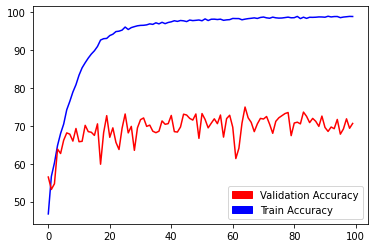

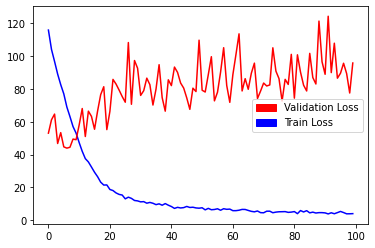

<All keys matched successfully>

In [19]:
# Learning
import copy

acc_t = []
acc_v = []

loss_train = []
loss_val = []

print('***START EPOCH***')
best_acc = 0.0  # beset accuracy 초기화
best_model_wts = copy.deepcopy(model.state_dict()) 

for epoch in range(100):
    print('# Epoch : {} /100'.format(epoch))
    train_img, pred_t, truth_t, accuracy_t, loss_t = run_train(model)
    valid_img, pred_v, truth_v, accuracy_v, loss_v = run_valid(model)
    #if epoch%4 == 0:
    print('Train Accuracy : {}'.format(accuracy_t))
    print('Validation Accuracy : {}'.format(accuracy_v))
    print('Train Loss : {}'.format(loss_t))
    print('Validation Loss : {}'.format(loss_v))
    acc_t.append(accuracy_t)
    acc_v.append(accuracy_v)
    loss_train.append(loss_t)
    loss_val.append(loss_v)

    if accuracy_v>best_acc:  # update best accuracy
      best_acc = accuracy_v
      best_model_wts = copy.deepcopy(model.state_dict())  # 가장 accuracy 높은 model 저장

plt.plot(range(len(acc_t)), acc_t, 'b', range(len(acc_v)), acc_v, 'r')
blue_patch = mpatches.Patch(color='blue', label='Train Accuracy')
red_patch = mpatches.Patch(color='red', label='Validation Accuracy')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

# Loss Graph
plt.plot(range(len(loss_train)), loss_train, 'b', range(len(loss_val)), loss_val, 'r')
blue_patch = mpatches.Patch(color='blue', label='Train Loss')
red_patch = mpatches.Patch(color='red', label='Validation Loss')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

model.load_state_dict(best_model_wts) # validation accuracy, 가장 높은 모델 저장


In [20]:
torch.save(model,'/content/drive/MyDrive/FashionClassification/근아 tuning/TeamB_Alexnet_guena')

In [21]:
def evaluate(model, test_loader):
    model.eval()      # 모델 평가 상태로
    test_loss = 0     # test_loss 초기화
    correct = 0       # 맞게 예측한 0 값으로 초기화
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-3)

    with torch.no_grad(): 
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)     # data, target DEVICE에 할당
            output = model(data)                                  # output 계산
            test_loss += criterion(output, target).item()         # loss 계산(총 loss 에 더해주기)
            pred = output.max(1, keepdim=True)[1]                 # 계산된 벡터값 중 가장 큰 값 가지는 class 예측
            correct += pred.eq(target.view_as(pred)).sum().item() # 맞게 예측한 값 세기
   
    test_loss /= len(test_loader.dataset)                         # 평균 loss
    test_accuracy = 100. * correct / len(test_loader.dataset)     # test(validation) 데이터 정확도
    return test_loss, test_accuracy

In [22]:
model=torch.load('/content/drive/MyDrive/FashionClassification/근아 tuning/TeamB_Alexnet_guena')
#model.eval()
_, train_acc = evaluate(model, train_loader)
_, val_acc = evaluate(model, valid_loader)

# prit saved model's train and validation accuracy
print('Train Accuracy: {:.4f}'.format(train_acc))
print('Validation Accuracy: {:.4f}'.format(val_acc))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Accuracy: 99.6597
Validation Accuracy: 75.0000


In [23]:
from sklearn.metrics import classification_report
def prediction(model, data_loader):
    model.eval()
    predlist=torch.zeros(0,dtype=torch.long, device='cpu')
    lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
    
    with torch.no_grad():
      for i, (data, label) in enumerate(data_loader):
        data = data.to(DEVICE)        # 데이터 DEVICE에 할당
        label = label.to(DEVICE)      # 라벨 값 DEVICE에 할당
        outputs = model(data)         # 예측
        _, preds = torch.max(outputs, 1)  # 가장 높은 확률 가지는 class 예측

        # Batch 단위 예측값 append 하기
        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist,label.view(-1).cpu()])
        
    # Classification Report
    print(classification_report(lbllist.numpy(), predlist.numpy())) # 클래스별 accuracy, recall, f1-score 
    return

In [24]:
prediction(model, valid_loader)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


              precision    recall  f1-score   support

           0       0.70      0.72      0.71       600
           1       0.78      0.81      0.79       600
           2       0.77      0.72      0.74       600

    accuracy                           0.75      1800
   macro avg       0.75      0.75      0.75      1800
weighted avg       0.75      0.75      0.75      1800

